In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


In [3]:
dataset = pd.read_csv("/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv")
dataset.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
train = dataset
train.drop("Name", axis = 1)

,Author,User Rating,Reviews,Price,Year,Genre
0,JJ Smith,4.7,17350,8,2016,Non Fiction
1,Stephen King,4.6,2052,22,2011,Fiction
2,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,George Orwell,4.7,21424,6,2017,Fiction
4,National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...
545,Jeff Kinney,4.9,9413,8,2019,Fiction
546,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [7]:
train["Genre"] = train["Genre"].astype("category")

In [12]:
train["Genre"] = train["Genre"].cat.codes

In [16]:
train.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

<Axes:xlabel='Price', ylabel='Genre'>

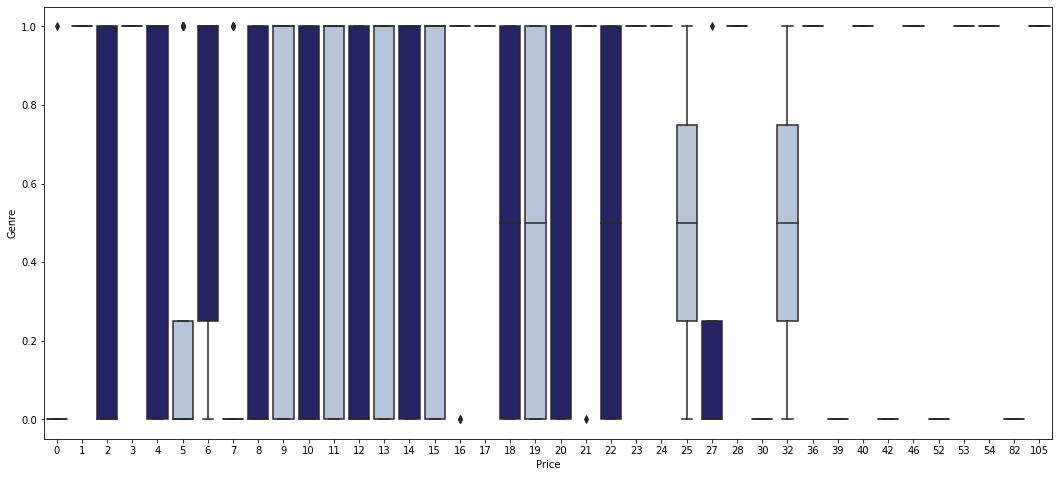

In [35]:
# fig
fig = plt.figure(figsize=(14,6))

# axes
axes = fig.add_axes([0,0,1,1])

sns.boxplot(x=train['Price'], y=train['Genre'], palette=['MidnightBlue','LightSteelBlue', ], ax=axes)


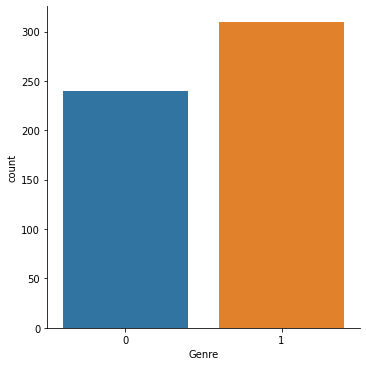

In [18]:
sns.catplot(x = "Genre",kind = "count", data = train)

We can see that there are more fiction books than non fiction books